In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [68]:
df=pd.read_csv("Data.csv")

In [69]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [70]:
df.shape

(209593, 37)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [72]:
df.isnull().values.any()

False

In [73]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

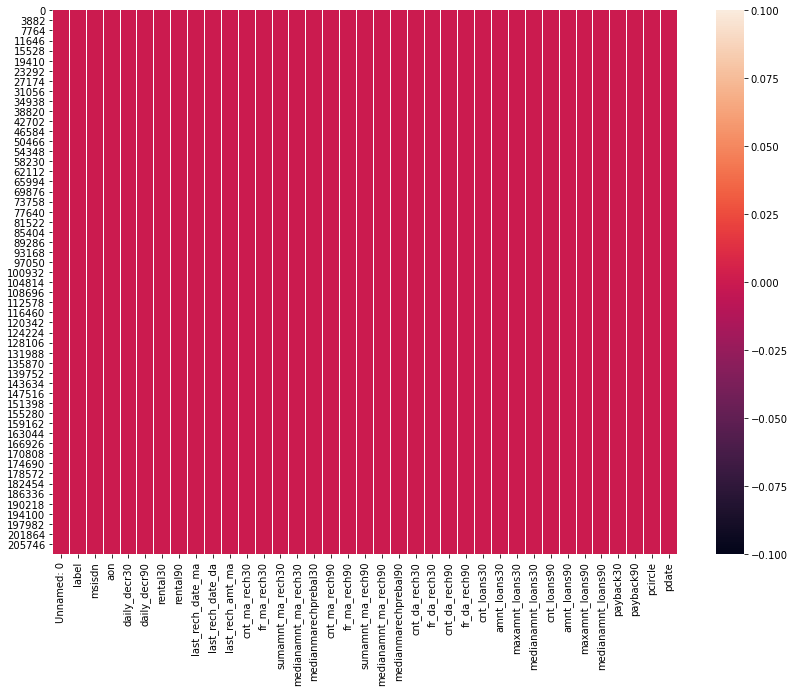

In [74]:
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull())

In [75]:
#Exploring categorical columns

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column)+":" +str(df[column].unique()))
        print(df[column].value_counts())
        print("**********************************************************")
        print("\n")

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
71742I90843    6
55809I89238    6
43430I70786    6
              ..
87790I95203    1
83043I88658    1
52540I95202    1
86755I88680    1
82474I89235    1
Name: msisdn, Length: 186243, dtype: int64
**********************************************************


pcircle:['UPW']
UPW    209593
Name: pcircle, dtype: int64
**********************************************************


pdate:['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-1

In [76]:
#For analyzing the data with target

df["label"].unique()

array([0, 1], dtype=int64)

In [77]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [78]:
#Summary Statistics

df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


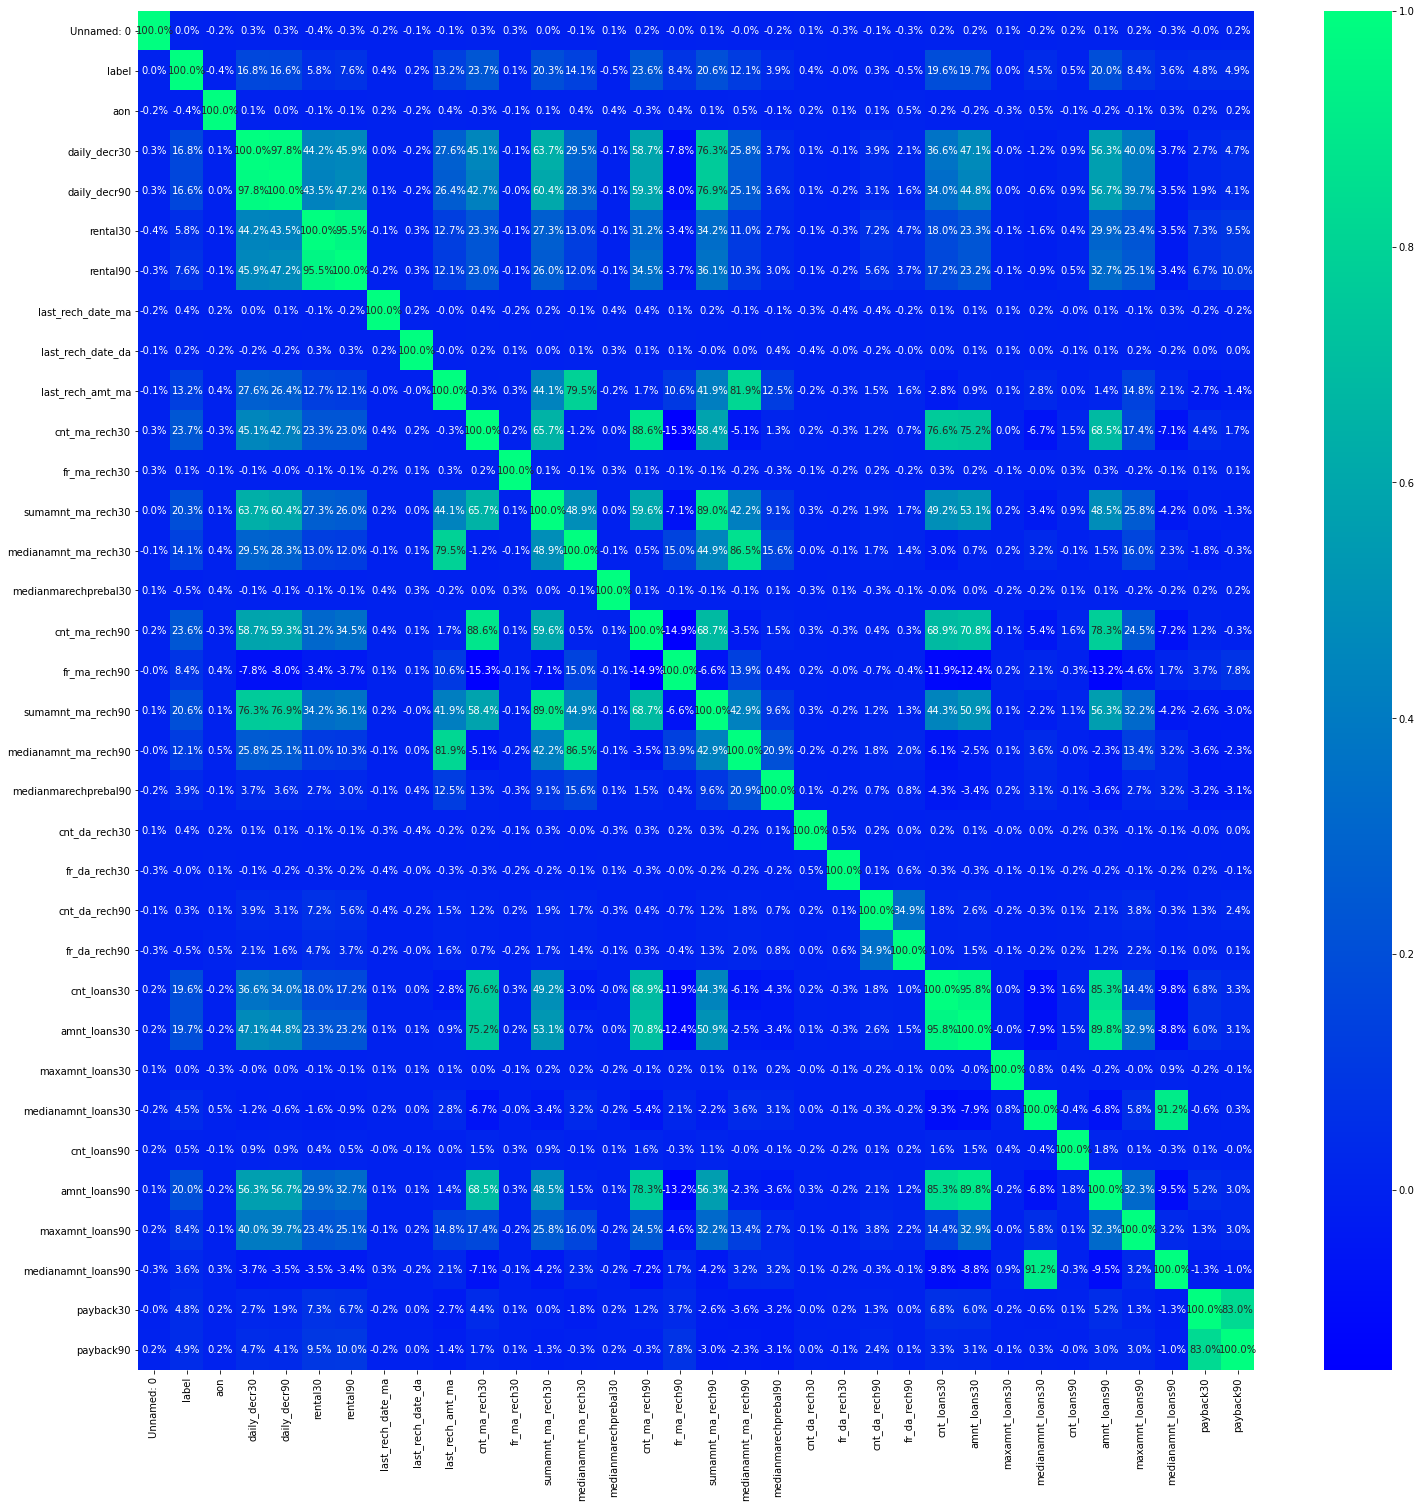

In [79]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,fmt='.001%',cmap='winter')

Text(0.5, 1.0, 'Correlation with Target Variable')

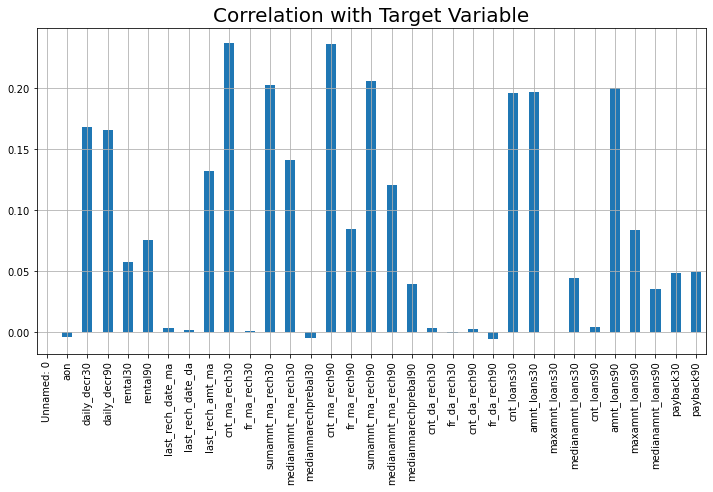

In [80]:
#Correlation with Target Variable

plt.figure(figsize=(12,6))
df.drop("label",axis=1).corrwith(df["label"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("Correlation with Target Variable", fontsize=20)

# Data Visualization

# Univariate Analysis

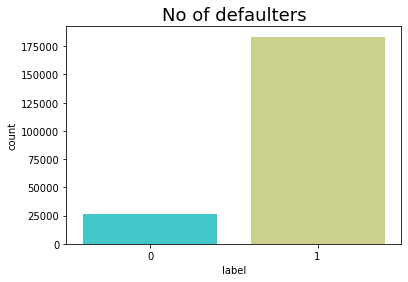

1    183431
0     26162
Name: label, dtype: int64


In [81]:
#Checking the number of defaulters

sns.countplot(x="label",data=df, palette='rainbow')
plt.title('No of defaulters',fontsize=18)
plt.show()

print(df["label"].value_counts())

In [82]:
df["label"].value_counts(normalize=True)

1    0.875177
0    0.124823
Name: label, dtype: float64

# Bivariate Analysis

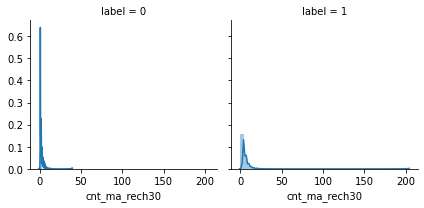

In [83]:
facet=sns.FacetGrid(df,col="label")
facet.map(sns.distplot,"cnt_ma_rech30")
plt.show()

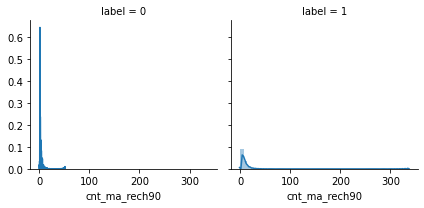

In [84]:
facet=sns.FacetGrid(df,col="label")
facet.map(sns.distplot,"cnt_ma_rech90")
plt.show()

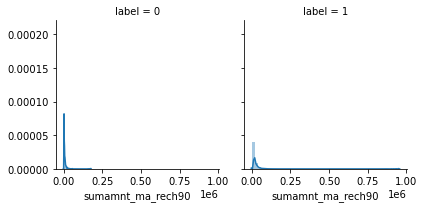

In [85]:
facet=sns.FacetGrid(df,col="label")
facet.map(sns.distplot,"sumamnt_ma_rech90")
plt.show()

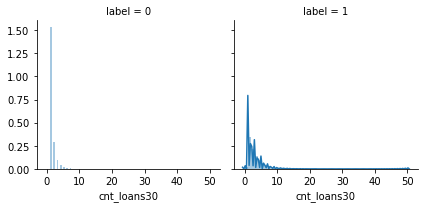

In [86]:
facet=sns.FacetGrid(df,col="label")
facet.map(sns.distplot,"cnt_loans30")
plt.show()

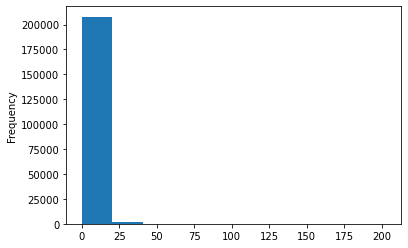

In [87]:
df['cnt_ma_rech30'].plot.hist()

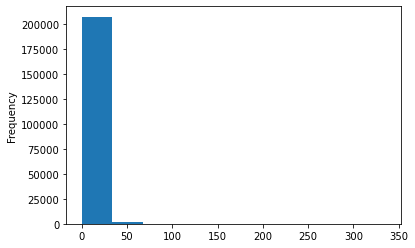

In [88]:
df['cnt_ma_rech90'].plot.hist()

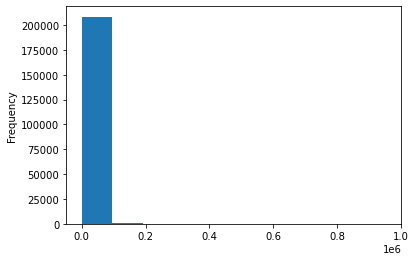

In [89]:
df['sumamnt_ma_rech90'].plot.hist()

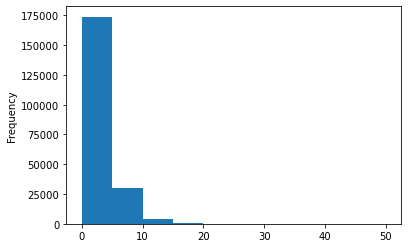

In [90]:

df['cnt_loans30'].plot.hist()

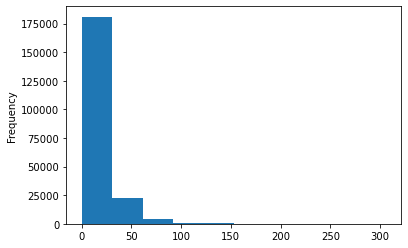

In [91]:

df['amnt_loans30'].plot.hist()

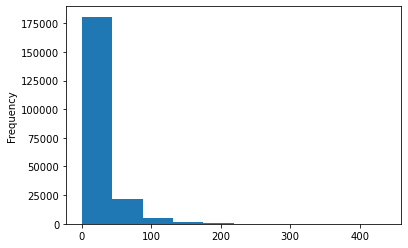

In [92]:
df['amnt_loans90'].plot.hist()

In [93]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [94]:
#Since pcircle is common for all , we will drop the column

df.drop(["pcircle"], axis=1, inplace=True)

In [95]:
df.shape

(209593, 36)

In [96]:
df["msisdn"].dtypes

dtype('O')

In [97]:
#Need to convert msisdn column in int data type

df["msisdn"]=df["msisdn"].str.slice(stop=2).astype(int)


In [98]:
df["msisdn"].dtypes

dtype('int32')

In [99]:
#Also need to convert pdate separately in day and month

df['p_day']=pd.to_datetime(df['pdate'],format='%Y-%m-%d').dt.day
df['p_month']=pd.to_datetime(df['pdate'],format='%Y-%m-%d').dt.month

In [100]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,p_day,p_month
0,1,0,21,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7
1,2,1,76,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8
2,3,1,17,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8
3,4,1,55,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,5,1,3,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6


In [101]:
#Dropping pdate

df.drop(["pdate"], axis=1, inplace=True)

In [102]:
df.shape

(209593, 37)

In [103]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [104]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month
0,0,21,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,3,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [105]:
df.shape

(209593, 36)

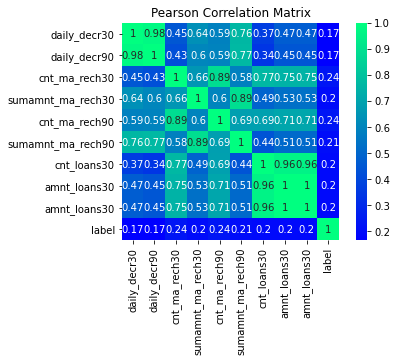

In [106]:
plt.title("Pearson Correlation Matrix")
sns.heatmap(df[["daily_decr30","daily_decr90","cnt_ma_rech30","sumamnt_ma_rech30","cnt_ma_rech90","sumamnt_ma_rech90",
               "cnt_loans30","amnt_loans30","amnt_loans30","label"]].corr(),annot=True,square=True, cmap="winter")

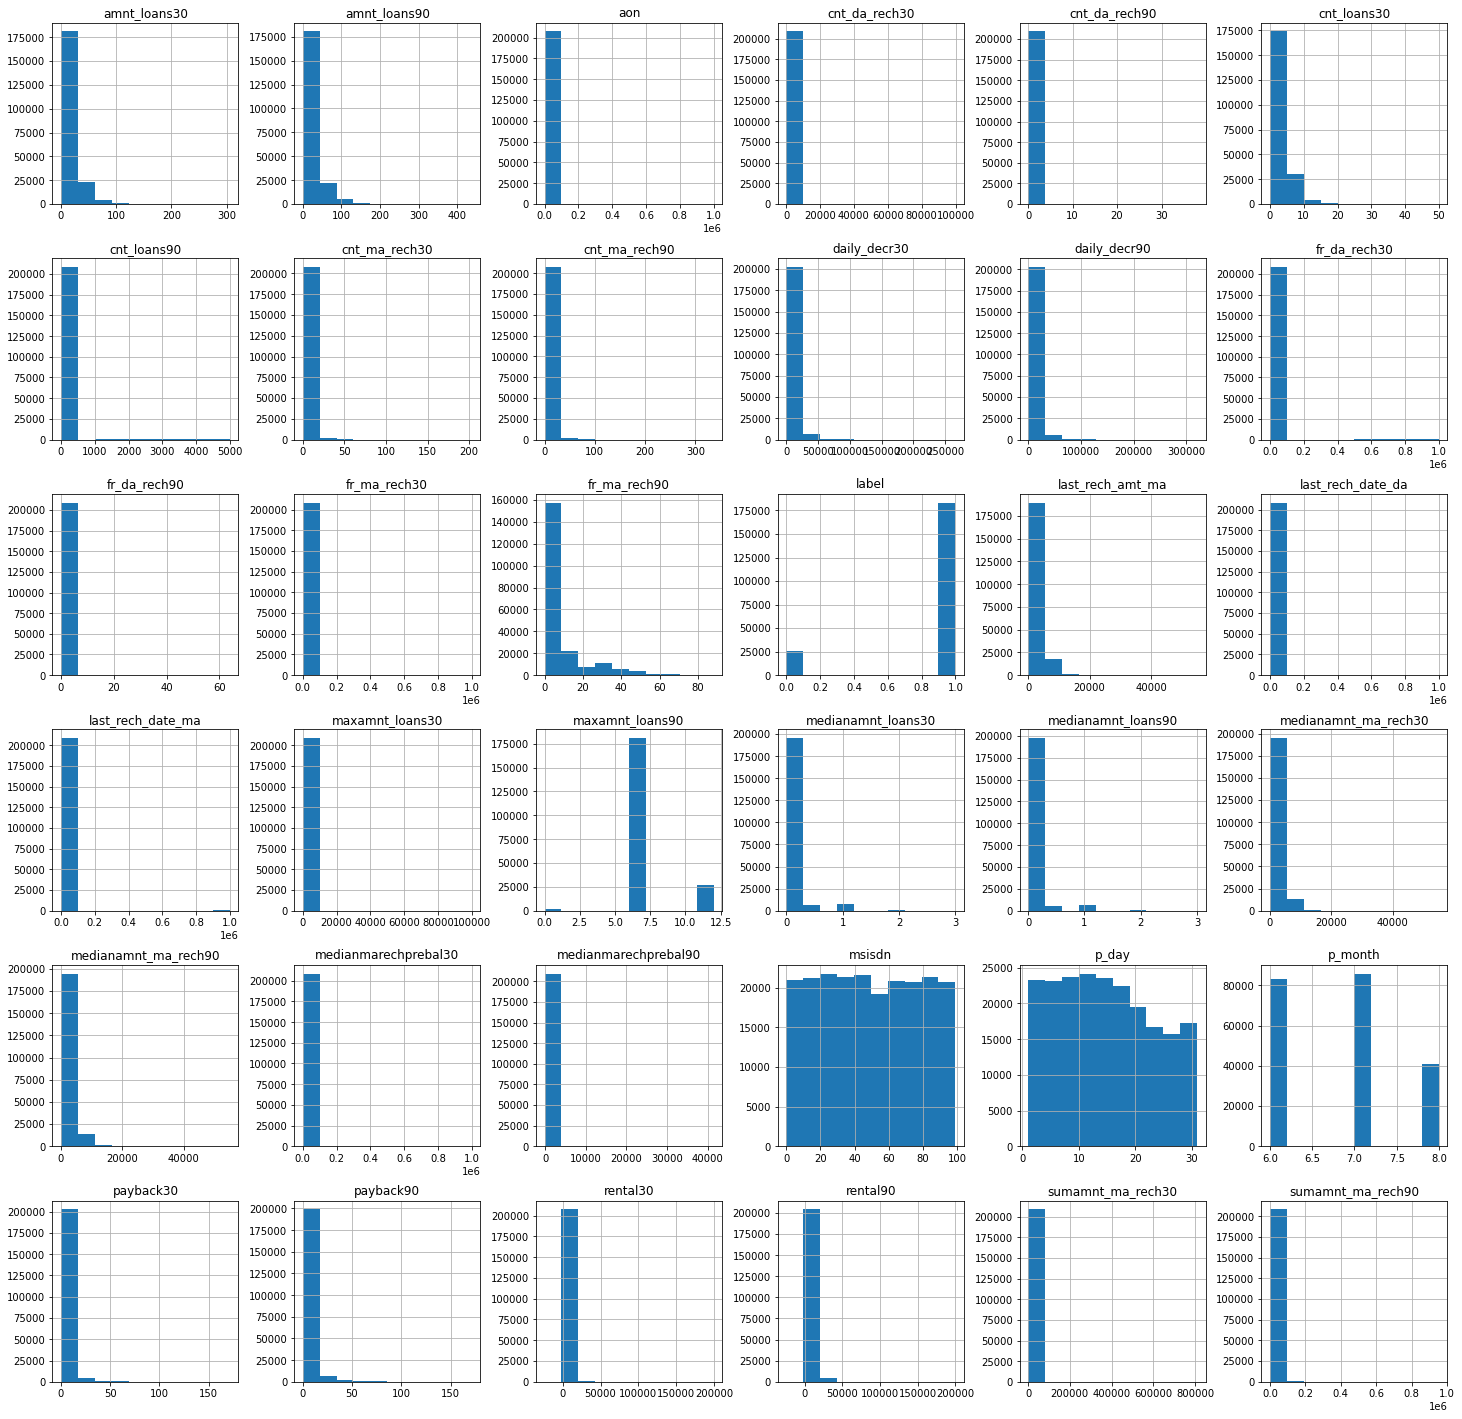

In [107]:
df.hist(figsize=(25,25))
plt.show()

In [108]:
#Create dependent and independent features
columns=df.columns.tolist()

#Filter the columns to remove data we donot want
columns=[c for c in columns if c not in ["label"]]

#Store the variable we are predicting 
target ="label"

#Define a random state

state=np.random.RandomState(42)
X=df[columns]
Y=df[target]
X_outliers=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

#Print the shape of X and Y

print(X.shape)
print(Y.shape)

(209593, 35)
(209593,)


In [109]:
df["label"].unique()

#0 stands for Defaulter
#1 stands for non-defaulter

array([0, 1], dtype=int64)

In [110]:
defaulter=df[df["label"]==0]
ndefaulter=df[df["label"]==1]

In [111]:
print(defaulter.shape,ndefaulter.shape)

(26162, 36) (183431, 36)


# For balancing the dataset we will use UnderSampling Technique

In [112]:
from imblearn.under_sampling import NearMiss

In [113]:
#Implementing Undersampling for Handling Imbalanced 

nm=NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [114]:
X_res.shape,y_res.shape

((52324, 35), (52324,))

In [115]:
from collections import Counter
print("Original data shape{}".format(Counter(Y)))
print("Resampled dataset shape{}".format(Counter(y_res)))

Original data shapeCounter({1: 183431, 0: 26162})
Resampled dataset shapeCounter({0: 26162, 1: 26162})


In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)

In [117]:
lg=LogisticRegression()

In [118]:
lg.fit(X_train,Y_train)

LogisticRegression()

In [119]:
pred=lg.predict(X_test)

In [120]:
pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [121]:
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.874359871497185
[[ 1228  6640]
 [ 1260 53750]]
              precision    recall  f1-score   support

           0       0.49      0.16      0.24      7868
           1       0.89      0.98      0.93     55010

    accuracy                           0.87     62878
   macro avg       0.69      0.57      0.58     62878
weighted avg       0.84      0.87      0.84     62878



In [122]:
from sklearn.naive_bayes import GaussianNB

In [123]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
predgnb=gnb.predict(X_test)

In [124]:
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

0.5462164827125545
[[ 7003   865]
 [27668 27342]]
              precision    recall  f1-score   support

           0       0.20      0.89      0.33      7868
           1       0.97      0.50      0.66     55010

    accuracy                           0.55     62878
   macro avg       0.59      0.69      0.49     62878
weighted avg       0.87      0.55      0.62     62878



In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [126]:
predknn=knn.predict(X_test)

In [127]:
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

0.8794808995197049
[[ 2602  5266]
 [ 2312 52698]]
              precision    recall  f1-score   support

           0       0.53      0.33      0.41      7868
           1       0.91      0.96      0.93     55010

    accuracy                           0.88     62878
   macro avg       0.72      0.64      0.67     62878
weighted avg       0.86      0.88      0.87     62878



In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [130]:
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

0.8823594898056554
[[ 4374  3494]
 [ 3903 51107]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      7868
           1       0.94      0.93      0.93     55010

    accuracy                           0.88     62878
   macro avg       0.73      0.74      0.74     62878
weighted avg       0.89      0.88      0.88     62878



# Ensemble Techniques

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

0.9210216609943064
[[ 3988  3880]
 [ 1086 53924]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      7868
           1       0.93      0.98      0.96     55010

    accuracy                           0.92     62878
   macro avg       0.86      0.74      0.79     62878
weighted avg       0.91      0.92      0.91     62878



In [132]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
predad=ad.predict(X_test)
print(accuracy_score(Y_test,predad))
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

0.9096186265466459
[[ 2965  4903]
 [  780 54230]]
              precision    recall  f1-score   support

           0       0.79      0.38      0.51      7868
           1       0.92      0.99      0.95     55010

    accuracy                           0.91     62878
   macro avg       0.85      0.68      0.73     62878
weighted avg       0.90      0.91      0.90     62878



# RandomForestClassifier is the best model to fit.

# AUC ROC Curve

In [133]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [134]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [135]:
y_pred_prob

array([0.49206677, 0.8713    , 0.72843957, ..., 0.79301199, 0.70858803,
       0.81194934])

In [136]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [137]:
fpr

array([0.00000000e+00, 2.54194204e-04, 2.54194204e-04, ...,
       9.99872903e-01, 1.00000000e+00, 1.00000000e+00])

In [138]:
tpr

array([0.        , 0.00241774, 0.00263588, ..., 0.99992729, 0.99992729,
       1.        ])

In [139]:
thresholds

array([2.        , 1.        , 1.        , ..., 0.27268137, 0.25009453,
       0.02640817])

Text(0.5, 1.0, 'Logistic Regression')

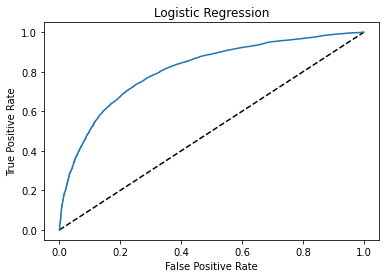

In [140]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")

In [141]:
auc_score=roc_auc_score(Y_test,lg.predict(X_test))

In [142]:
print(auc_score)

0.566585157553736


In [143]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
p=dt.predict(X_test)
print(accuracy_score(Y_test,p))

0.8837431216005598


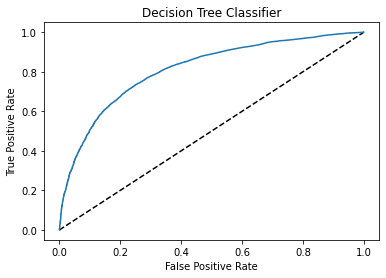

In [150]:
y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier")
plt.show()
auc_score=roc_auc_score(Y_test,dt.predict(X_test))

In [151]:
print(auc_score)

0.7442025676895461


In [152]:
import joblib

#Save the model as object file(Serialization)
joblib.dump(rf,"rffile.obj")

['rffile.obj']

In [153]:
#Load the model from the file(Deserialization)

rf_from_joblib=joblib.load("rffile.obj")

In [154]:
rf_from_joblib.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)